# **Heart Diesease Prediction**

## **Table of Contents**
1. | Business Understanding
2. | Data Understanding
  1. | Reading Dataset
3. | Data Preparation
  1. | Data Selection
  2. | Perbandingan Data
  3. | Format Data
4. | Modeling
5. | Evaluate
6. | Deployment

## **1. | Business Understanding**

Heart Diesease Prediction merupakan prediksi yang dilakukan untuk mengetahui kondisi seseorang pasien yang terinfeksi penyakit jantung dengan cepat menggunakan mechine learning

## **2. | Data Understanding**

### 2.1 | Import Library

Kita mengimport beberapa library yang dibutuhkan pada proses penelitian ini, yaitu :

* numpy
* pandas
* matplotlib
* seaborn
* sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# -- Tidak digunakan untuk sementara ---

# from sklearn.preprocessing import MinMaxScaler

### 2.2 | Reading Dataset

Membaca dataset untuk mengetahui jumlah row & column dataset, mengetahui data type atribut, dan untuk mengetahui missing value dari dataset yang telah di siapkan.

In [2]:
# --- Import Dataset ---
missing_value_formats = ["n.a.","?","NA","n/a","na","-","NaN"] # default format untuk missing value
df = pd.read_csv(r"datasets/HD-Patients-Merged.csv", na_values = missing_value_formats)

# --- Membaca Dataset ---
df.head(5)

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name,num
0,1254,0,40,1,1,0,0,NaN,2,140.0,...,NaN,1,1,1,1,1,NaN,NaN,name,negative
1,1255,0,49,0,1,0,0,NaN,3,160.0,...,NaN,1,1,1,1,1,NaN,NaN,name,positive
2,1256,0,37,1,1,0,0,NaN,2,130.0,...,NaN,1,1,1,1,1,NaN,NaN,name,negative
3,1257,0,48,0,1,1,1,NaN,4,138.0,...,NaN,1,1,1,1,1,NaN,NaN,name,positive
4,1258,0,54,1,1,0,1,NaN,3,150.0,...,NaN,1,1,1,1,1,NaN,NaN,name,negative


In [3]:
# --- Informasi Dataset ---
print('Informasi Dataset')
print('-' * 30)
print('Total Baris:', df.shape[0])
print('Total Kolom:', df.shape[1])
print('-' * 30)
print('\n')

# --- Detail dari Dataset ---
print('Detail Dataset')
print('-' * 30)
df.info()

Informasi Dataset
------------------------------
Total Baris: 294
Total Kolom: 76
------------------------------


Detail Dataset
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        294 non-null    int64  
 1   ccf       294 non-null    int64  
 2   age       294 non-null    int64  
 3   sex       294 non-null    int64  
 4   painloc   294 non-null    int64  
 5   painexer  294 non-null    int64  
 6   relrest   294 non-null    int64  
 7   pncaden   0 non-null      float64
 8   cp        294 non-null    int64  
 9   trestbps  293 non-null    float64
 10  htn       293 non-null    float64
 11  chol      271 non-null    float64
 12  smoke     12 non-null     float64
 13  cigs      1 non-null      float64
 14  years     0 non-null      float64
 15  fbs       286 non-null    float64
 16  dm        21 non-null     f

Dari detail dataset di atas, kita tahu bahwa dataset ini memiliki 294 Baris dan 76 Kolom.

* Baris : Berisi record dari dataset.
* Kolom : Berisi atribut yang terdapat di dataset.

Dan pada dataset di atas kita bisa lihat terdapat 3 format dari data types :
* object : Variabel bersifat kategori. Variabel kategori dalam dataset kami yaitu name, num.
* int64 : Ini mewakili variabel integer. Atribut age adalah contoh format ini.
* float64 : Ini mewakili variabel yang melibatkan beberapa nilai desimal. float64 juga merupakan numerical variables.

In [4]:
# --- Mengecek Data yang Kosong ---
df.isnull().sum()

id           0
ccf          0
age          0
sex          0
painloc      0
          ... 
lvf          0
cathef     266
junk       294
name         0
num          0
Length: 76, dtype: int64

<Axes: >

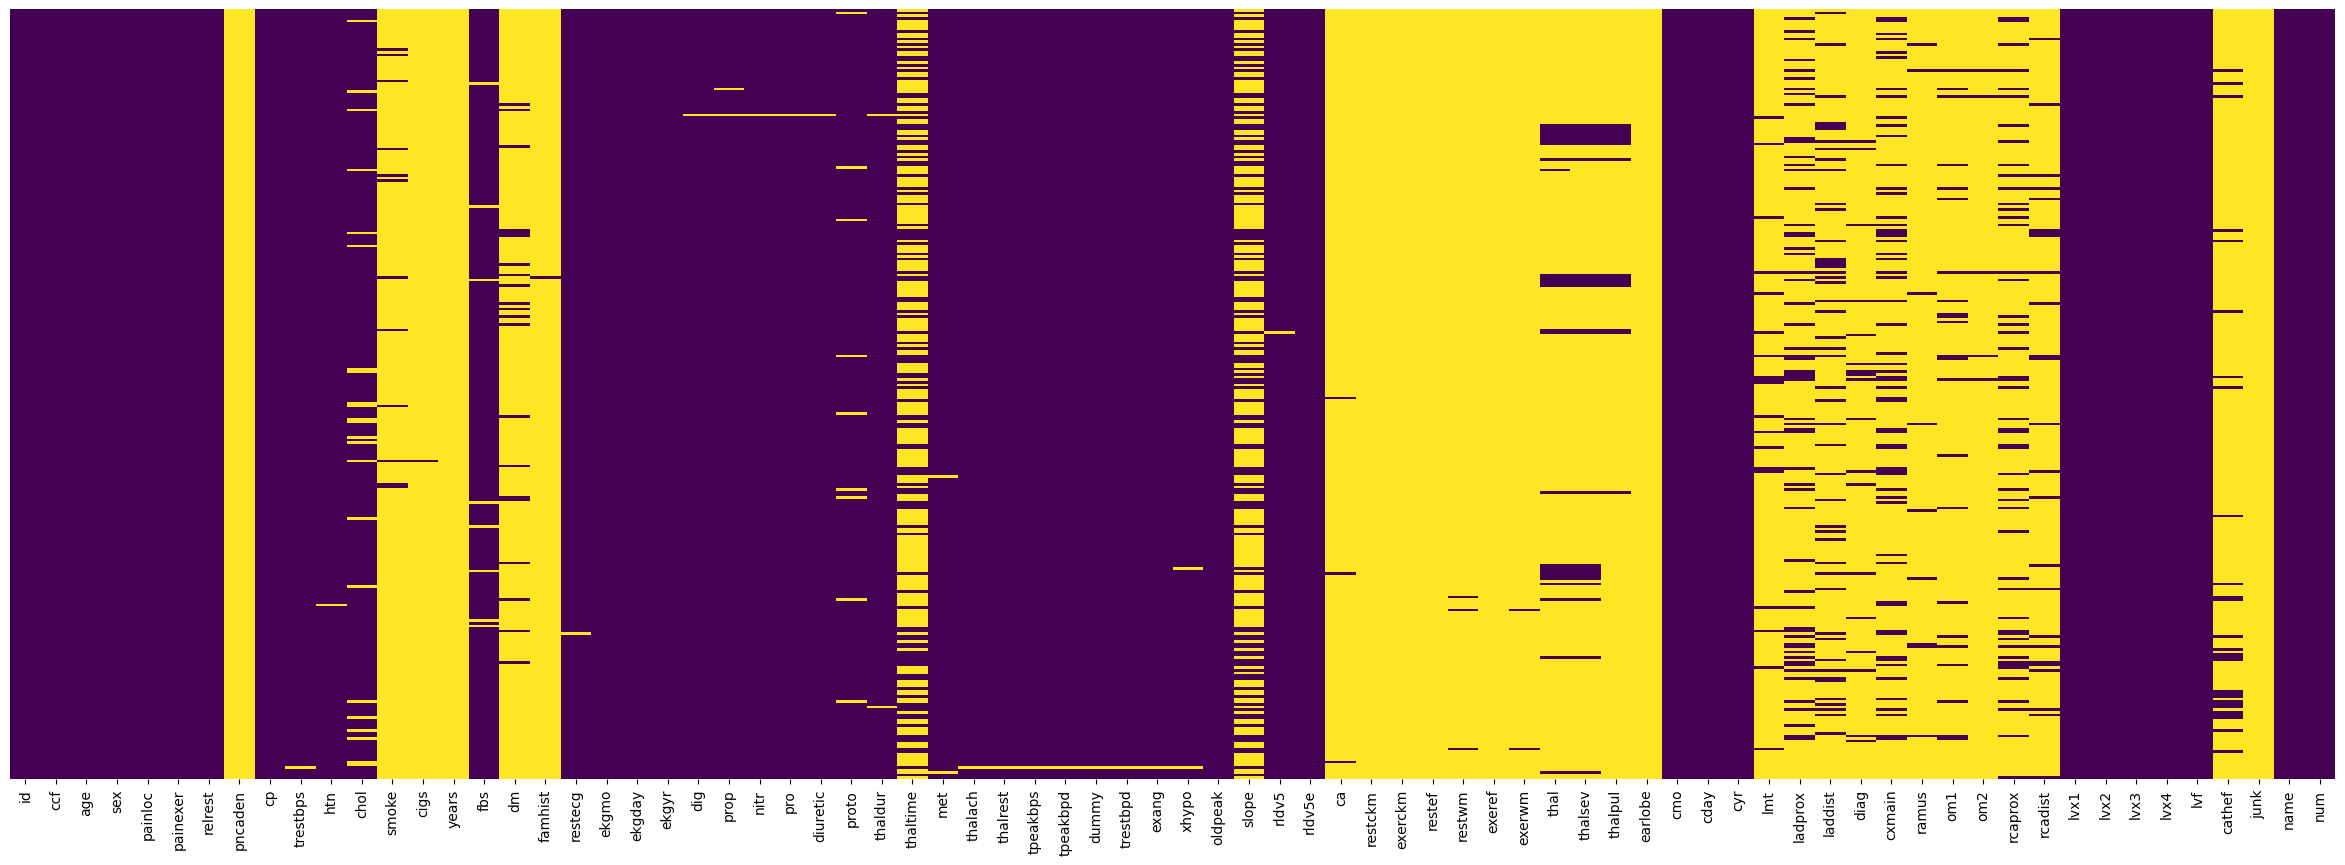

In [5]:
# --- Visualisasi dari Data Kosong (Missing Value) ---
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)

Dari visualisasi di atas, terdapat banyak sekali missing value dari dataset yang ditandai dengan garis warna kuning.

In [6]:
# --- Deskripsi Tentang Dataset ---
df.describe()

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk
count,294.000000,294.0,294.000000,294.000000,294.000000,294.000000,294.000000,0.0,294.000000,293.000000,...,5.0,50.000000,25.000000,294.0,294.000000,294.000000,294.000000,294.000000,28.000000,0.0
mean,1195.853741,0.0,47.826531,0.724490,0.921769,0.442177,0.520408,NaN,2.982993,132.583618,...,2.0,1.800000,1.880000,1.0,1.006803,1.068027,1.479592,1.102041,60.571429,NaN
std,397.340367,0.0,7.811812,0.447533,0.268993,0.497492,0.500435,NaN,0.965117,17.626568,...,0.0,0.404061,0.331662,0.0,0.116642,0.454929,1.549389,0.364550,11.786460,NaN
min,1001.000000,0.0,28.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,92.000000,...,2.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,18.000000,NaN
25%,1080.250000,0.0,42.000000,0.000000,1.000000,0.000000,0.000000,NaN,2.000000,120.000000,...,2.0,2.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,58.750000,NaN
50%,1158.500000,0.0,49.000000,1.000000,1.000000,0.000000,1.000000,NaN,3.000000,130.000000,...,2.0,2.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,63.500000,NaN
75%,1235.750000,0.0,54.000000,1.000000,1.000000,1.000000,1.000000,NaN,4.000000,140.000000,...,2.0,2.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,67.250000,NaN
max,5002.000000,0.0,66.000000,1.000000,1.000000,1.000000,1.000000,NaN,4.000000,200.000000,...,2.0,2.000000,2.000000,1.0,3.000000,5.000000,8.000000,4.000000,75.000000,NaN


## **3. | Data Preparation**

Pada tahap Data Preparation ini bertujuan untuk mengolah dataset yang kotor menjadi dataset yang matang agar bisa digunakan pada pengoperasian matematika. Tahap ini biasanya melakukan proses :

* Data Selection : Memilih atribut yang diperlukan dan menghapus atribut yang tidak diperlukan.
* Imputation : Mengisi data yang kosong dengan fill missing values atau imputation.
* Format Data : Mengubah format data type, contohnya gender menjadi 1 = Laki-laki dan 0 = Perempuan.

### **3.1 | Data Selection**

Tahap Data Selection ini kita akan memilih atribut yang diperlukan untuk penelitian dan membuat atribut yang tidak diperlukan. Kita bisa mengetahui atribut yang diperlukan ini dari keterangan atribut. Misalnya atribut 'age', atribut tersebut sangat berhubungan dengan penelitian ini karna semakin tua umur manusia maka semakin rentan terkena penyakit jantung.

In [7]:
# --- Drop Atribut ---
df.drop(["pncaden","years","cigs","famhist","ca","restckm","exerckm","restef","exeref","exerwm","thal","thalsev","thalpul","earlobe","junk"], axis = 1, inplace = True)

# ca, thal, dan slope di buang utk sementara

<Axes: >

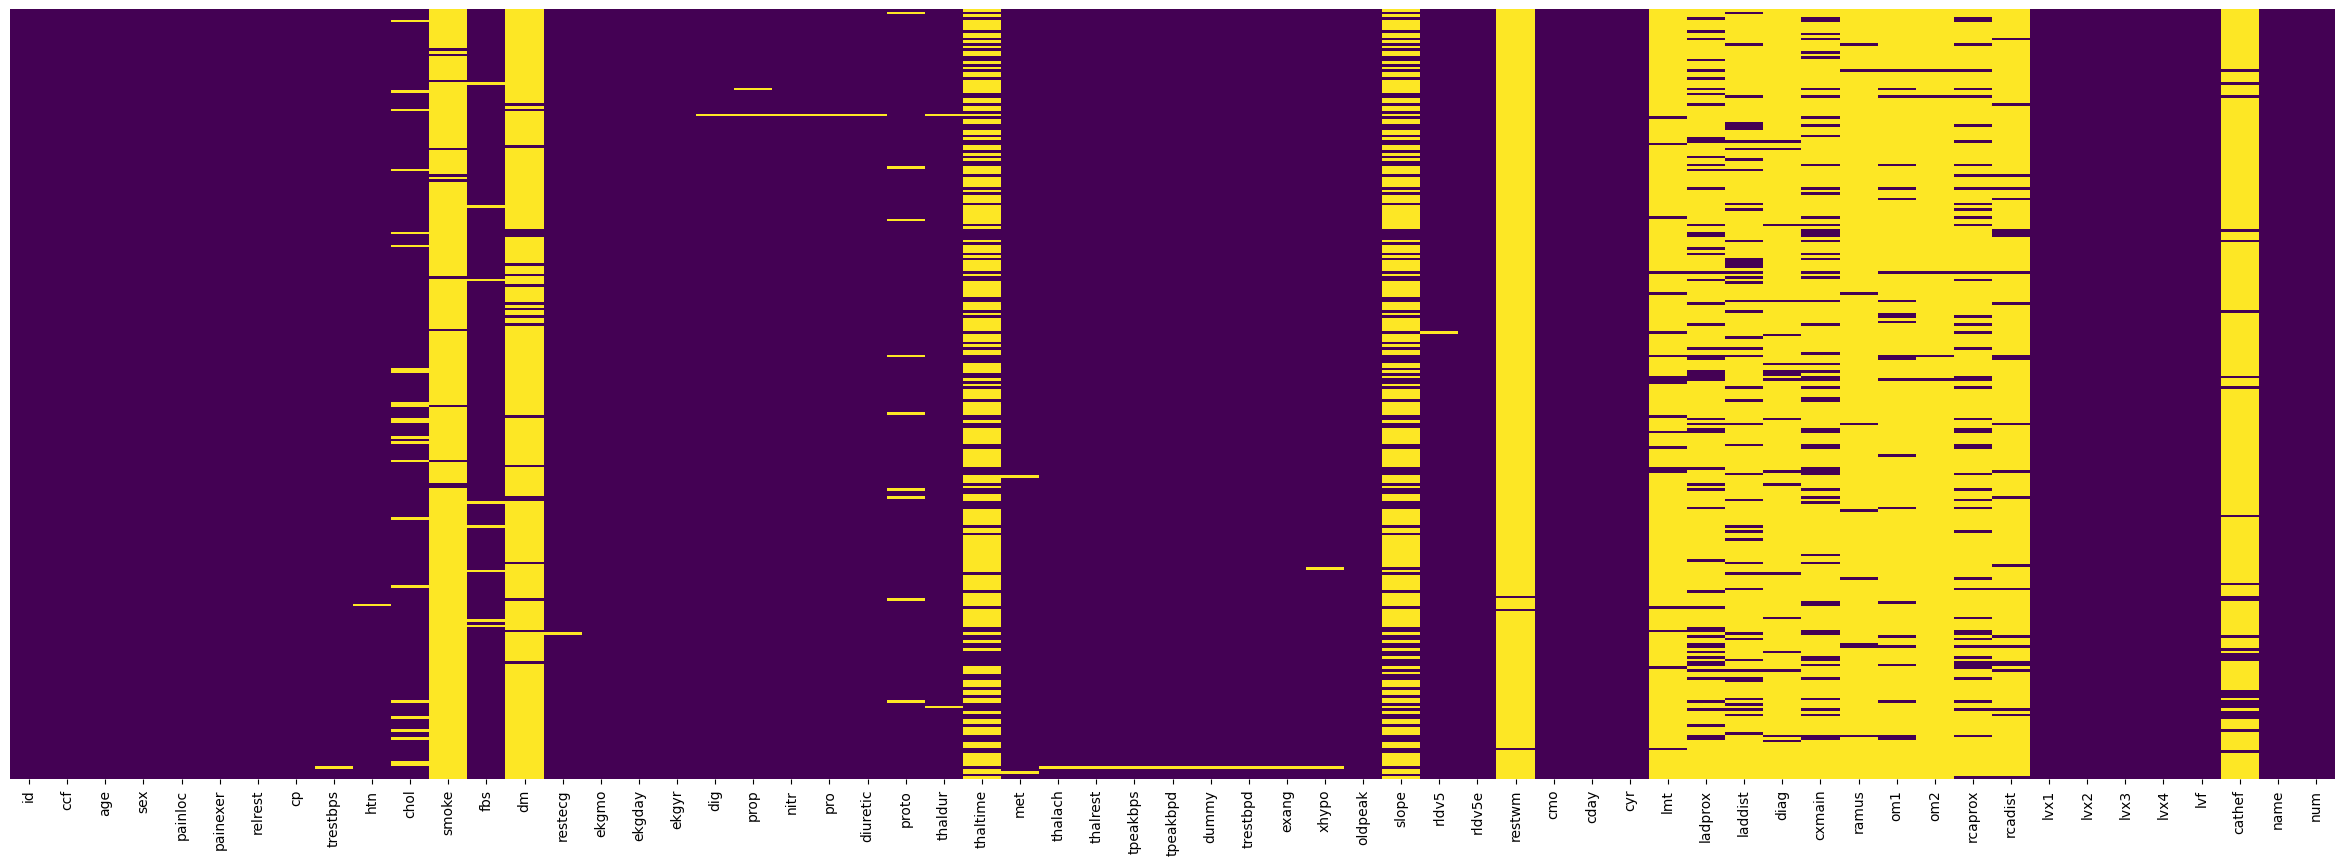

In [8]:
# --- Visualisasi Missing Values ---
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

Setelah data drop di atas, kita lihat bahwa masih banyak terdapat data missing di atas, jadi kita drop saja data missingnya yang lebih dari 60%.

In [9]:
df.drop(["smoke","dm","thaltime","lmt","ladprox","laddist","diag","cxmain","ramus","om1","om2","rcaprox","rcadist","lvx1","lvx2","lvx3","lvx4","lvf","cathef","restwm"], axis = 1, inplace = True)

<Axes: >

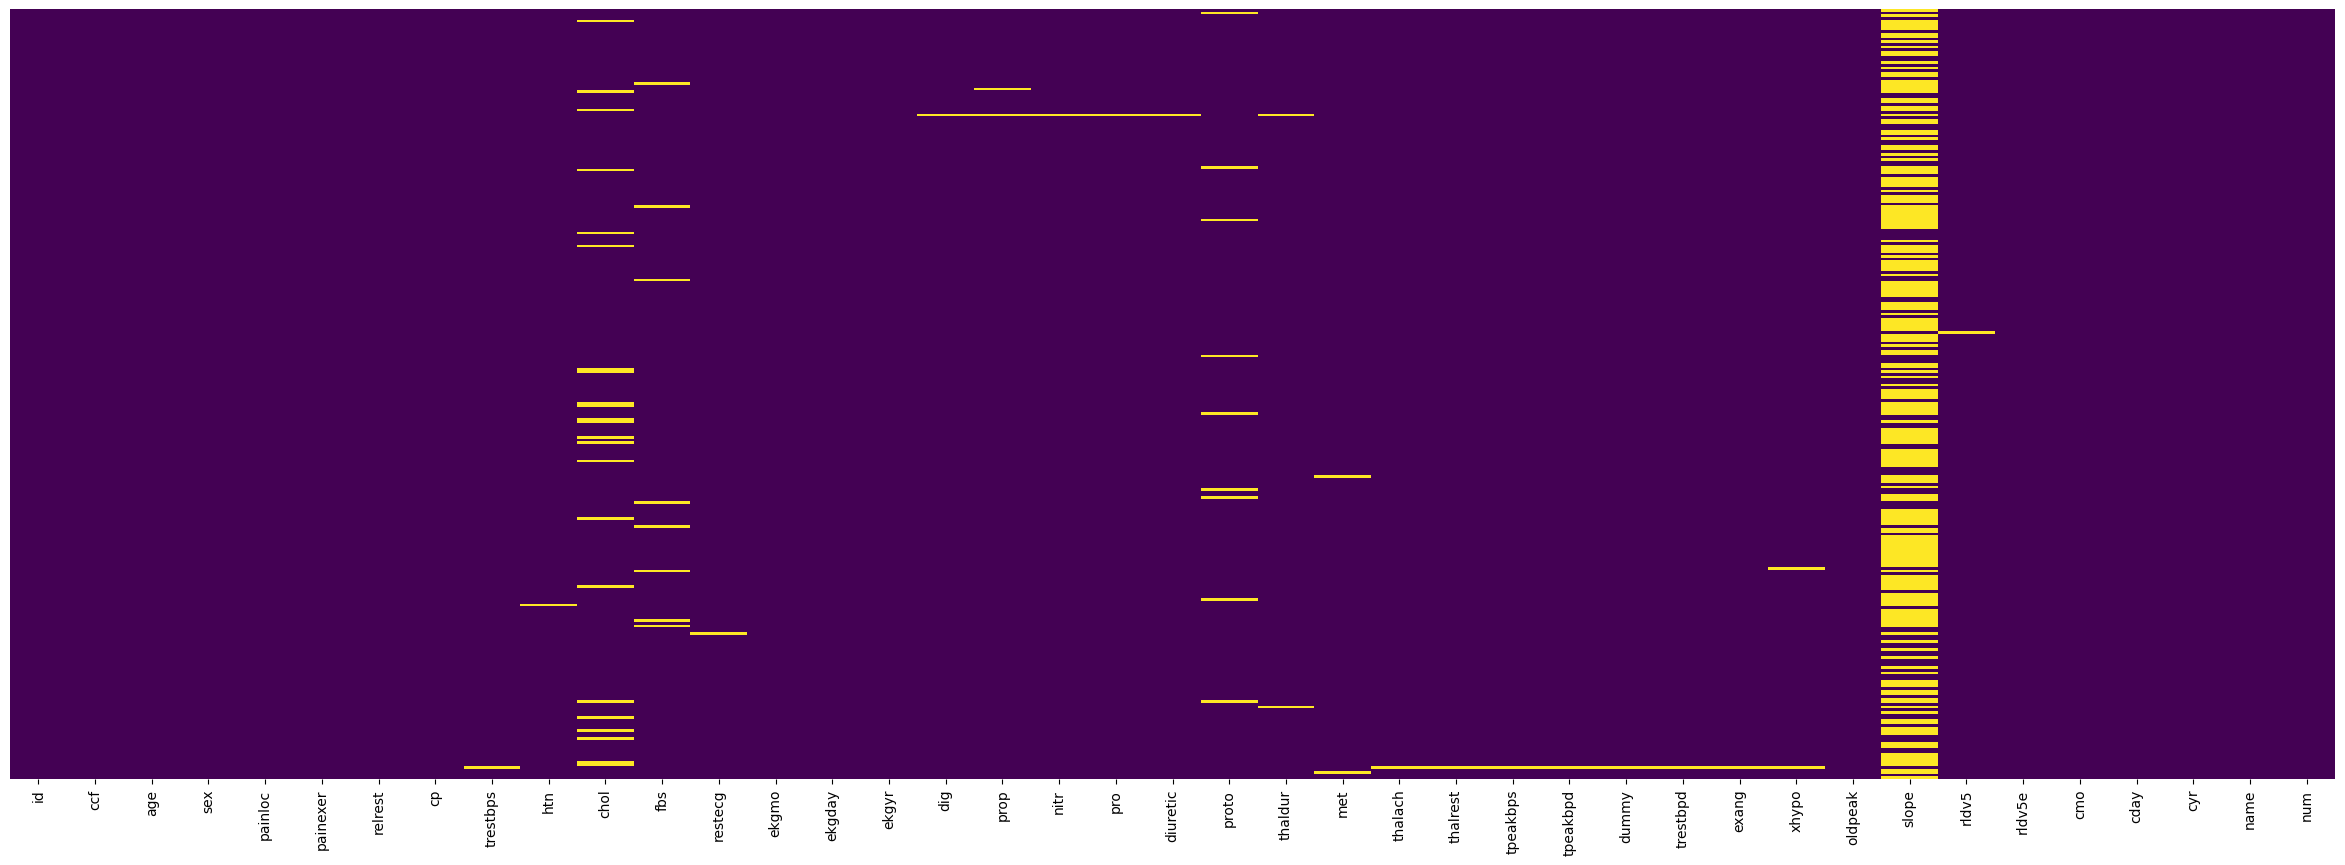

In [10]:
# --- Visualisasi Missing Values ---
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [11]:
df.head(5)

,id,ccf,age,sex,painloc,painexer,relrest,cp,trestbps,htn,...,xhypo,oldpeak,slope,rldv5,rldv5e,cmo,cday,cyr,name,num
0,1254,0,40,1,1,0,0,2,140.0,0.0,...,0.0,0.0,NaN,26.0,20,12,20,84,name,negative
1,1255,0,49,0,1,0,0,3,160.0,1.0,...,0.0,1.0,2.0,14.0,13,11,20,84,name,positive
2,1256,0,37,1,1,0,0,2,130.0,0.0,...,0.0,0.0,NaN,17.0,14,11,26,84,name,negative
3,1257,0,48,0,1,1,1,4,138.0,0.0,...,0.0,1.5,2.0,19.0,22,9,30,84,name,positive
4,1258,0,54,1,1,0,1,3,150.0,0.0,...,1.0,0.0,NaN,13.0,9,7,30,84,name,negative


Setelah data di seleksi, maka tahapan selanjutnya kita akan mengisi data yang kosong.

In [12]:
# --- Mengecek Data yang Kosong ---
df.isnull().sum()

id            0
ccf           0
age           0
sex           0
painloc       0
painexer      0
relrest       0
cp            0
trestbps      1
htn           1
chol         23
fbs           8
restecg       1
ekgmo         0
ekgday        0
ekgyr         0
dig           1
prop          2
nitr          1
pro           1
diuretic      1
proto         9
thaldur       2
met           2
thalach       1
thalrest      1
tpeakbps      1
tpeakbpd      1
dummy         1
trestbpd      1
exang         1
xhypo         2
oldpeak       0
slope       190
rldv5         1
rldv5e        0
cmo           0
cday          0
cyr           0
name          0
num           0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        294 non-null    int64  
 1   ccf       294 non-null    int64  
 2   age       294 non-null    int64  
 3   sex       294 non-null    int64  
 4   painloc   294 non-null    int64  
 5   painexer  294 non-null    int64  
 6   relrest   294 non-null    int64  
 7   cp        294 non-null    int64  
 8   trestbps  293 non-null    float64
 9   htn       293 non-null    float64
 10  chol      271 non-null    float64
 11  fbs       286 non-null    float64
 12  restecg   293 non-null    float64
 13  ekgmo     294 non-null    int64  
 14  ekgday    294 non-null    int64  
 15  ekgyr     294 non-null    int64  
 16  dig       293 non-null    float64
 17  prop      292 non-null    float64
 18  nitr      293 non-null    float64
 19  pro       293 non-null    float64
 20  diuretic  293 non-null    float6

In [14]:
# --- Mengisi Data yang Kosong ---
df["chol"] = df["chol"].replace(np.NaN, df["chol"].mean())
df["fbs"] = df["fbs"].replace(np.NaN, df["fbs"].mean())
df["trestbps"] = df["trestbps"].replace(np.NaN, df["trestbps"].mean())
df["proto"] = df["proto"].replace(np.NaN, df["proto"].mean())
df["slope"] = df["slope"].fillna(2)

<Axes: >

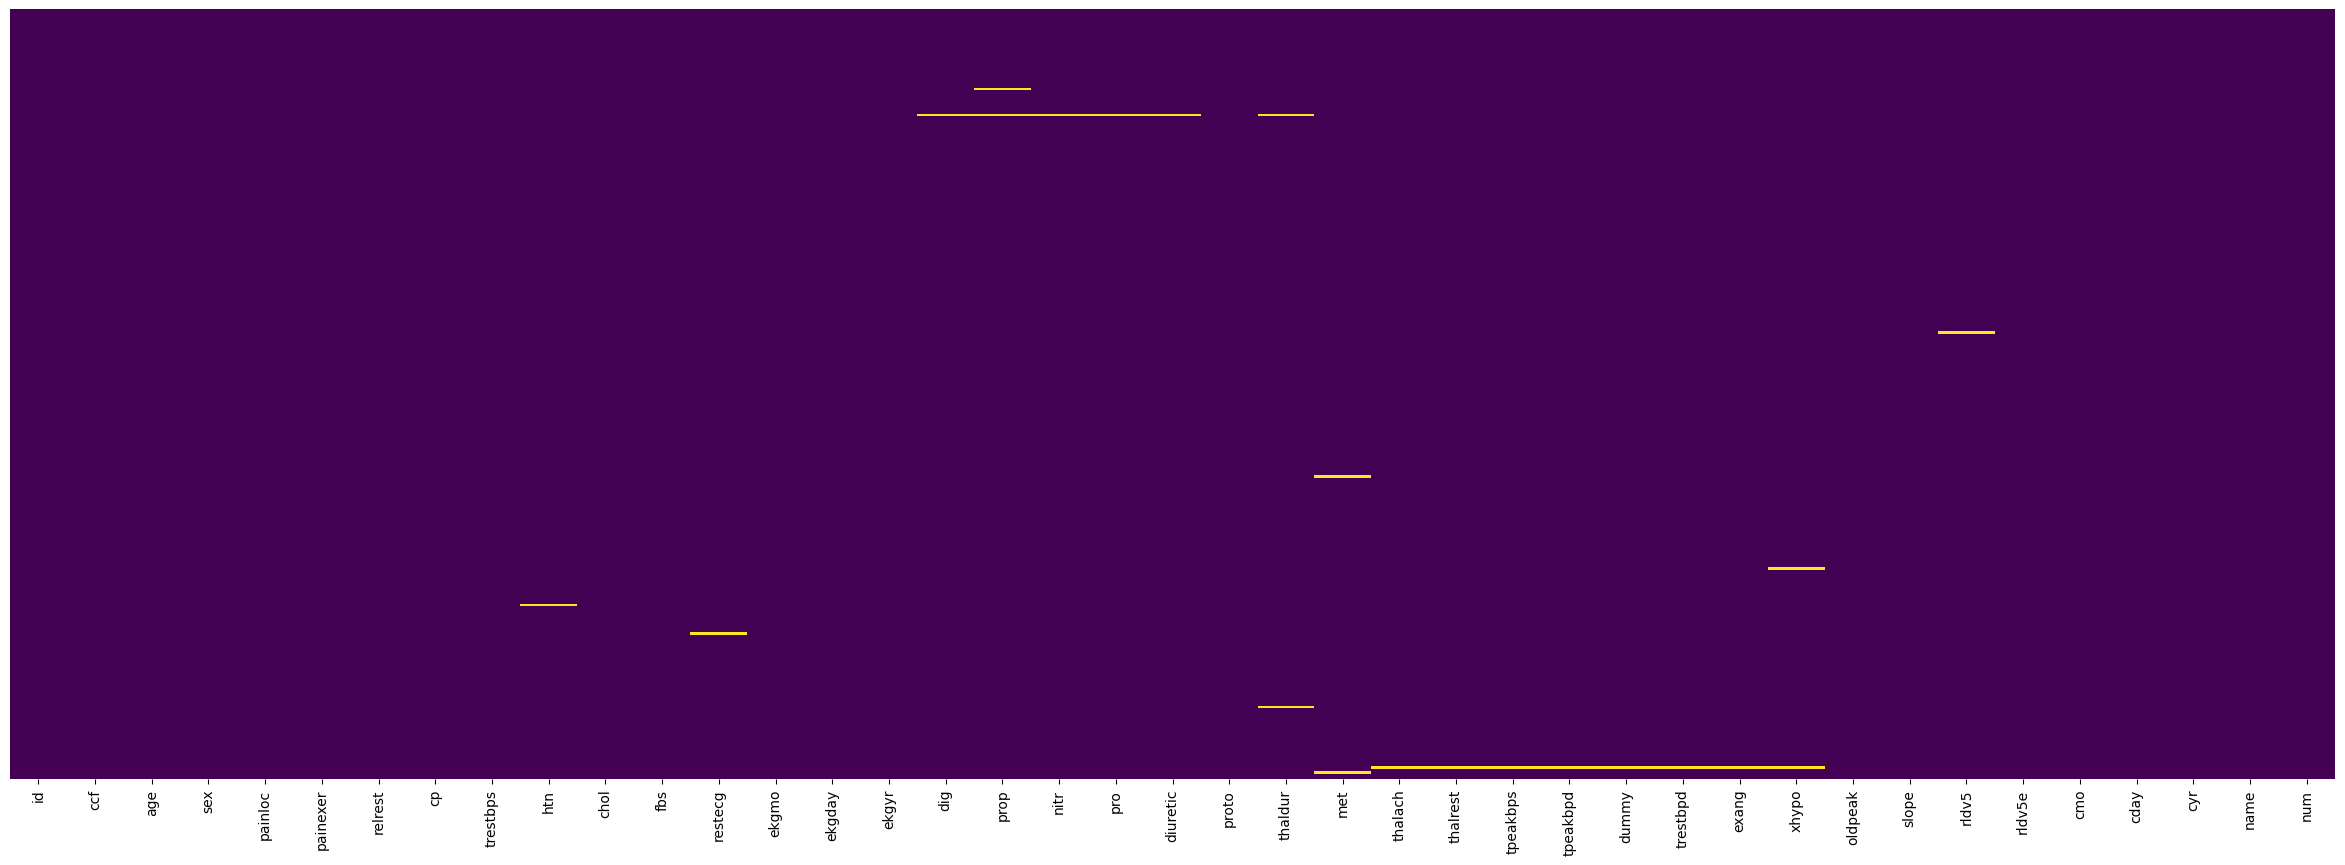

In [15]:
# --- Visualisasi dari Data Kosong (Missing Values) ---
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [16]:
df["trestbps"].fillna(method='pad',inplace=True)
df["htn"].fillna(method='pad',inplace=True)
df["dig"].fillna(method='pad',inplace=True)
df["prop"].fillna(method='pad',inplace=True)
df["nitr"].fillna(method='pad',inplace=True)
df["pro"].fillna(method='pad',inplace=True)
df["diuretic"].fillna(method='pad',inplace=True)
df["thaldur"].fillna(method='pad',inplace=True)
df["met"].fillna(method='pad',inplace=True)
df["restecg"].fillna(method='pad',inplace=True)
df["thalach"].fillna(method='pad',inplace=True)
df["thalrest"].fillna(method='pad',inplace=True)
df["tpeakbps"].fillna(method='pad',inplace=True)
df["tpeakbpd"].fillna(method='pad',inplace=True)
df["dummy"].fillna(method='pad',inplace=True)
df["trestbpd"].fillna(method='pad',inplace=True)
df["xhypo"].fillna(method='pad',inplace=True)
df["exang"].fillna(method='pad',inplace=True)
df["rldv5"].fillna(method='pad',inplace=True)

<Axes: >

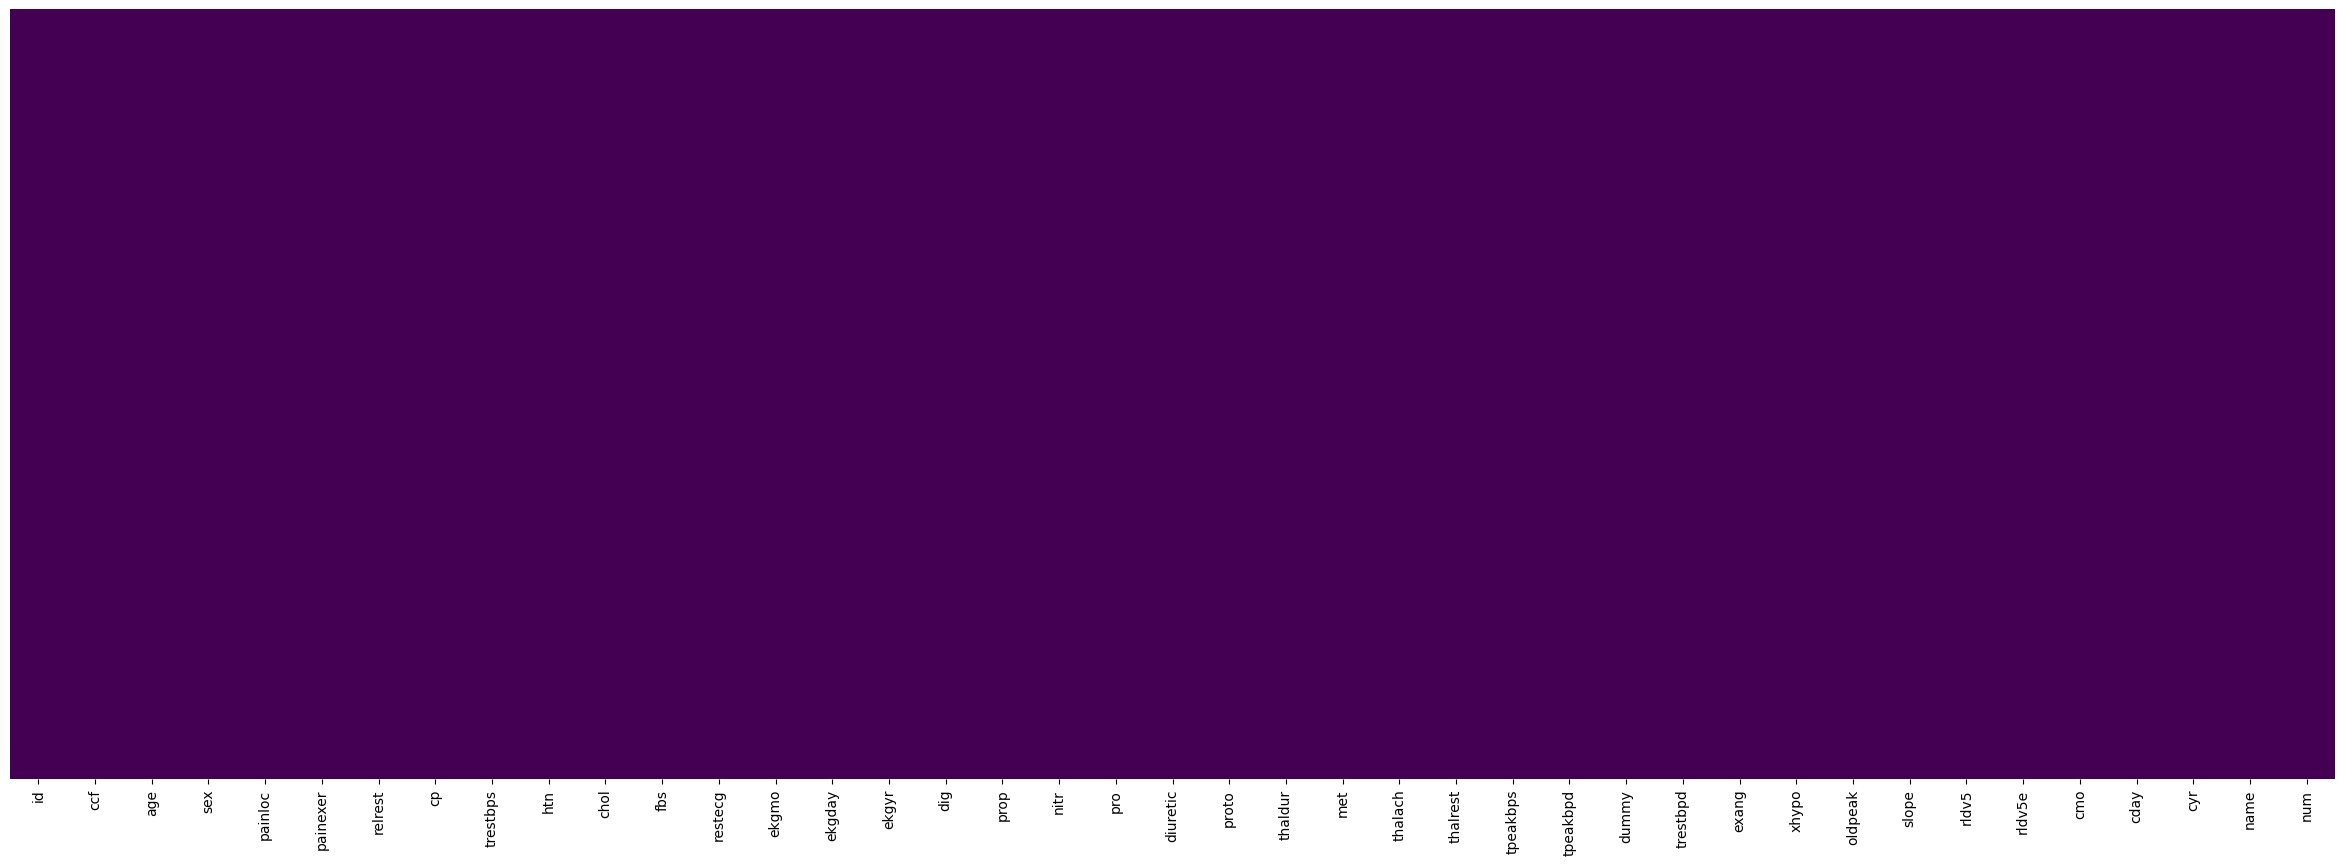

In [17]:
# --- Visualisasi dari Data Kosong ( Missing Values) ---
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

Setelah data diseleksi dan tidak ada data yang kosong, maka dataset ini bisa kita gunakan untuk perbandingan data dan modeling.

### **3.2 | Perbandingan Data**

Pada tahapan ini sebenarnya tidak terlalu penting, tapi kita akan melihat perbandingan antar data untuk melihat pandangan kita terhadap perbandingan data ini.

**Perbandingan Heart Disease Terhadap Gender**

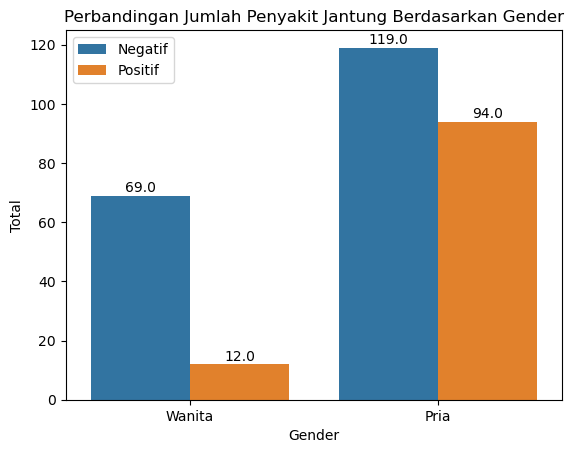

In [18]:
# --- Menentukan Label Diagram ---
labels = ['Negatif', 'Positif']
label_gender = np.array([0, 1])
label_gender2 = ['Wanita', 'Pria']

ax = sns.countplot(x="sex", hue="num", data=df)

# --- Membuat Diagram Batang ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+1.25,rect.get_height(), horizontalalignment='center', fontsize=10)

plt.title('Perbandingan Jumlah Penyakit Jantung Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Total',)
plt.xticks(label_gender, label_gender2, rotation=0)
plt.legend(labels=labels, loc='upper left', frameon=True);

Kesimpulan dari diagram diatas yaitu banyak Pria yang terkena penyakit jantung daripada Wanita.

**Perbandingan Heart Disease Terhadap Usia**

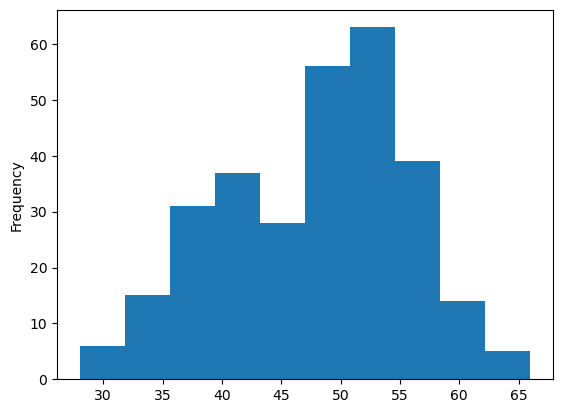

In [19]:
df['age'].plot(kind='hist');

Kesimpulan statistik diatas yaitu banyak orang yang terkena penyakit jantung pada usia 55.

Kita akan menyeleksi lagi atribut untuk dijadikan heatmap dan menghapus atribut yang tidak diperlukan untuk melihat korelasi dan akan dipisah menjadi numerical dan categorical.

In [20]:
# --- Drop atau Hapus Atribut ---
df.drop(["id","ccf","painloc","painexer","relrest","htn","ekgmo","ekgday","ekgyr","dig","prop","nitr","pro","diuretic","proto","thaldur","met","thalrest","tpeakbps","tpeakbpd","dummy","trestbpd","xhypo","rldv5","rldv5e","cmo","cday","cyr","name"], axis = 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    float64
 11  num       294 non-null    object 
dtypes: float64(8), int64(3), object(1)
memory usage: 27.7+ KB


C:\Users\adria\AppData\Local\Temp\ipykernel_13652\2751233193.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)


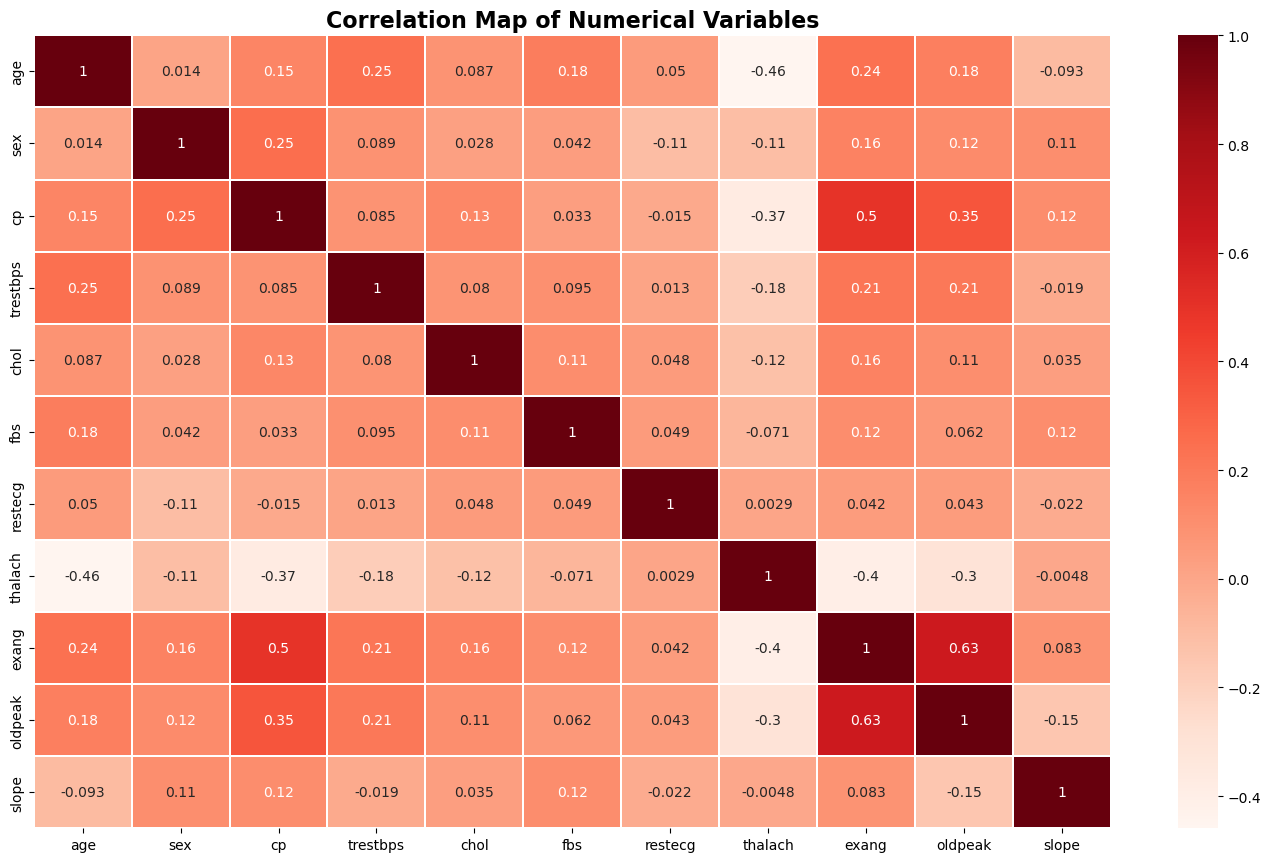

In [22]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.title('Correlation Map of Numerical Variables', fontweight='heavy', fontsize=16)
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

### **3.3 | Format Data**

Pada tahapan ini, kita akan mengubah tipe data dari atribut yang tersedia, contohnya atribut 'num' kita ubah menjadi 1 = positif dan 0 = negatif. Hal ini bertujuan untuk membantu komputer ketika melakukan logika matematika pada proses modeling.

In [23]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,40,1,2,140.0,289.000000,0.0,0.0,172.0,0.0,0.0,2.0,negative
1,49,0,3,160.0,180.000000,0.0,0.0,156.0,0.0,1.0,2.0,positive
2,37,1,2,130.0,283.000000,0.0,1.0,98.0,0.0,0.0,2.0,negative
3,48,0,4,138.0,214.000000,0.0,0.0,108.0,1.0,1.5,2.0,positive
4,54,1,3,150.0,250.848708,0.0,0.0,122.0,0.0,0.0,2.0,negative
5,39,1,3,120.0,339.000000,0.0,0.0,170.0,0.0,0.0,2.0,negative
6,45,0,2,130.0,237.000000,0.0,0.0,170.0,0.0,0.0,2.0,negative
7,54,1,2,110.0,208.000000,0.0,0.0,142.0,0.0,0.0,2.0,negative
8,37,1,4,140.0,207.000000,0.0,0.0,130.0,1.0,1.5,2.0,positive
9,48,0,2,120.0,284.000000,0.0,0.0,120.0,0.0,0.0,2.0,negative


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    float64
 11  num       294 non-null    object 
dtypes: float64(8), int64(3), object(1)
memory usage: 27.7+ KB


Mengubah tipe data numerical menjadi StandardScaler.

In [25]:
df = df.copy()
scaler = StandardScaler()
num_cols = ['age','trestbps','chol','thalach','oldpeak']
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,-1.003592,1,2,0.422189,0.588415,0.0,0.0,1.398992,0.0,-0.646074,2.0,negative
1,0.150473,0,3,1.560719,-1.092714,0.0,0.0,0.718519,0.0,0.456339,2.0,positive
2,-1.388281,1,2,-0.147076,0.495876,0.0,1.0,-1.748198,0.0,-0.646074,2.0,negative
3,0.022244,0,4,0.308336,-0.568325,0.0,0.0,-1.322902,1.0,1.007545,2.0,positive
4,0.791621,1,3,0.991454,0.000000,0.0,0.0,-0.727487,0.0,-0.646074,2.0,negative


Mengubah tipe data categorical menjadi numerical dengan encode data type categorical tersebut.

In [26]:
encoder = OneHotEncoder(sparse=False)


# Encode target value atau hasil prediksi yaitu num
df['num'] = df['num'].apply(lambda x: 1 if x == 'positive' else 0)

print('Shape of dataframe:', df.shape)
df.head()

Shape of dataframe: (294, 12)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,-1.003592,1,2,0.422189,0.588415,0.0,0.0,1.398992,0.0,-0.646074,2.0,0
1,0.150473,0,3,1.560719,-1.092714,0.0,0.0,0.718519,0.0,0.456339,2.0,1
2,-1.388281,1,2,-0.147076,0.495876,0.0,1.0,-1.748198,0.0,-0.646074,2.0,0
3,0.022244,0,4,0.308336,-0.568325,0.0,0.0,-1.322902,1.0,1.007545,2.0,1
4,0.791621,1,3,0.991454,0.000000,0.0,0.0,-0.727487,0.0,-0.646074,2.0,0


In [27]:
# Select Features
feature = df.drop('num', axis=1)

# Select Target
target = df['num']

# Set Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(feature , target, shuffle = True, test_size=0.2, random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (235, 11)
Shape of testing feature: (59, 11)
Shape of training label: (235,)
Shape of training label: (59,)


## **4. | Modeling**

In [28]:
# Building Random Forest model
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## **5. | Evaluate**

In [29]:
def evaluate_model(model, x_test, y_test):

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [30]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
rfacc = accuracy_score(y_pred_rf, y_test)
print('Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(rfacc*100))
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Random Forest Accuracy: 84.75%
Accuracy: 0.847457627118644
Precision: 0.7391304347826086
Recall: 0.85
F1 Score: 0.7906976744186046
Cohens Kappa Score: 0.6716141001855287
Area Under Curve: 0.8980769230769231
Confusion Matrix:
 [[33  6]
 [ 3 17]]


## **6. | Deployment**

In [31]:
X = df.drop('num', axis=1)
y = df['num']
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [32]:
X = df.drop('num', axis=1)
y = df['num']
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,-1.003592,1,2,0.422189,0.588415,0.0,0.0,1.398992,0.0,-0.646074,2.0,0
1,0.150473,0,3,1.560719,-1.092714,0.0,0.0,0.718519,0.0,0.456339,2.0,1
2,-1.388281,1,2,-0.147076,0.495876,0.0,1.0,-1.748198,0.0,-0.646074,2.0,0
3,0.022244,0,4,0.308336,-0.568325,0.0,0.0,-1.322902,1.0,1.007545,2.0,1
4,0.791621,1,3,0.991454,0.000000,0.0,0.0,-0.727487,0.0,-0.646074,2.0,0


In [34]:
new_data = pd.DataFrame({
    'age' : 40,
    'sex' : 1,
    'cp'  : 2,
    'trestbps'  : 140,
    'chol'  : 289,
    'fbs' : 0,
    'restecg' : 0,
    'thalach' : 172,
    'exang' : 0,
    'oldpeak' : 0,
    'slope' : 2
}, index=[0])

In [35]:
# --- Predict With RandomForest Model ---

pred = rf.predict(new_data)

if pred[0]==1:
  print('Terkena Penyakit Jantung')
else:
  print('Tidak Terkena Penyakit Jantung')

Tidak Terkena Penyakit Jantung


In [36]:
new_data = pd.DataFrame({
    'age' : 49,
    'sex' : 0,
    'cp'  : 3,
    'trestbps'  : 160,
    'chol'  : 180,
    'fbs' : 0,
    'restecg' : 1,
    'thalach' : 156,
    'exang' : 0,
    'oldpeak' : 1,
    'slope' : 2
}, index=[0])

In [37]:
# --- Predict With RandomForest Model ---

pred = rf.predict(new_data)

if pred[0]==1:
  print('Terkena Penyakit Jantung')
else:
  print('Tidak Terkena Penyakit Jantung')

Terkena Penyakit Jantung
